In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data set creation

In [163]:
POLLUTANTS = ['cd', 'cr', 'pb', 'fe', 'mn', 'co', 'ni', 'zn', 'cu']
# mg/L
GUIDES = {
 'cd': 0.003, 'cr': 0.05, 'pb': 0.05, 'fe': 0.3,
 'mn': 0.1,   'co': 0.05, 'ni': 0.02, 'zn': 3.0, 'cu': 0.05
}
SAFE_MEANS = {
    'cd': 0.0008, 'cr': 0.01, 'pb': 0.01, 'fe': 0.05,
    'mn': 0.02,   'co': 0.005, 'ni': 0.004, 'zn': 0.5, 'cu': 0.01
}
SAFE_STDS = {
    metal: max(0.1 * mean, mean * 0.05)  # 10% of mean, or 5% if mean is very small
    for metal, mean in SAFE_MEANS.items()
}
LOGNORMAL_MEANS = {
    metal: np.log(g * 2) 
    for metal, g in GUIDES.items()
}
INSANE_RANGES = {
    metal: (10 * val, 100 * val)
    for metal, val in GUIDES.items()
}

# hold the random generation of np
np.random.seed(42)
INSANE_RANGES['cd'][1]

0.3

In [143]:
def visualise_dist(dist):
    sns.kdeplot(dist, fill=True, color='skyblue')
    plt.axvline(SAFE_MEANS['cd'], color='red', linestyle='--', label='Mean')
    plt.title("Distribution of cd_safe (KDE)")
    plt.legend()
    plt.show()

In [144]:
# normal distribution of safe ranges
cd_safe = np.random.normal(loc=SAFE_MEANS['cd'], scale=SAFE_STDS['cd'], size=500)
cr_safe = np.random.normal(loc=SAFE_MEANS['cr'], scale=SAFE_STDS['cr'], size=500)
pb_safe = np.random.normal(loc=SAFE_MEANS['pb'], scale=SAFE_STDS['pb'], size=500)
fe_safe = np.random.normal(loc=SAFE_MEANS['fe'], scale=SAFE_STDS['fe'], size=500)
mn_safe = np.random.normal(loc=SAFE_MEANS['mn'], scale=SAFE_STDS['mn'], size=500)
co_safe = np.random.normal(loc=SAFE_MEANS['co'], scale=SAFE_STDS['co'], size=500)
ni_safe = np.random.normal(loc=SAFE_MEANS['ni'], scale=SAFE_STDS['ni'], size=500)
zn_safe = np.random.normal(loc=SAFE_MEANS['zn'], scale=SAFE_STDS['zn'], size=500)
cu_safe = np.random.normal(loc=SAFE_MEANS['cu'], scale=SAFE_STDS['cu'], size=500)

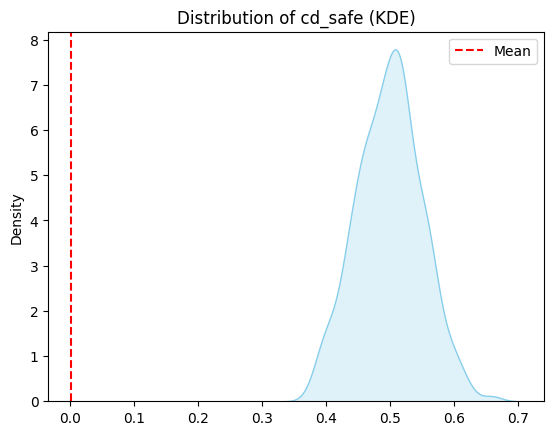

In [145]:
visualise_dist(zn_safe)

In [146]:
# lognormal distribution of the polluted range
cd_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['cd'], sigma=1.2, size=50)
cr_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['cr'], sigma=1.2, size=50)
pb_poll= np.random.lognormal(mean=LOGNORMAL_MEANS['pb'], sigma=1.2, size=50)
fe_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['fe'], sigma=1.2, size=50)
mn_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['mn'], sigma=1.2, size=50)
co_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['co'], sigma=1.2, size=50)
ni_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['ni'], sigma=1.2, size=50)
zn_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['zn'], sigma=1.2, size=50)
cu_poll = np.random.lognormal(mean=LOGNORMAL_MEANS['cu'], sigma=1.2, size=50)

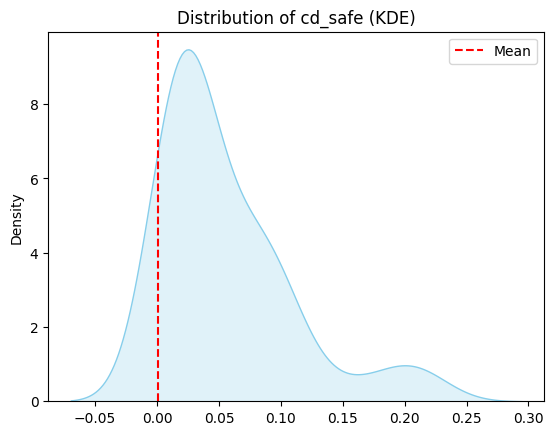

In [147]:
visualise_dist(ni_poll)

In [148]:
# uniform distribution of the non paulsible range (insane)
cd_insane = np.random.uniform(*INSANE_RANGES['cd'], size=20)
cr_insane = np.random.uniform(*INSANE_RANGES['cr'], size=20)
pb_insane = np.random.uniform(*INSANE_RANGES['pb'], size=20)
fe_insane = np.random.uniform(*INSANE_RANGES['fe'], size=20)
mn_insane = np.random.uniform(*INSANE_RANGES['mn'], size=20)
co_insane = np.random.uniform(*INSANE_RANGES['co'], size=20)
ni_insane = np.random.uniform(*INSANE_RANGES['ni'], size=20)
zn_insane = np.random.uniform(*INSANE_RANGES['zn'], size=20)
cu_insane = np.random.uniform(*INSANE_RANGES['cu'], size=20)

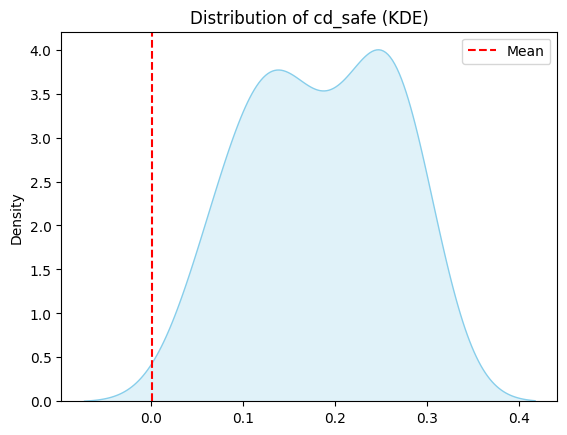

In [149]:
visualise_dist(cd_insane)

In [150]:
# combine data the data (actual dataset)
cd_data = np.concatenate([cd_safe, cd_poll, cd_insane])
cr_data = np.concatenate([cr_safe, cr_poll, cr_insane])
pb_data = np.concatenate([pb_safe, pb_poll, pb_insane])
fe_data = np.concatenate([fe_safe, fe_poll, fe_insane])
ni_data = np.concatenate([ni_safe, ni_poll, ni_insane])
cu_data = np.concatenate([cu_safe, cu_poll, cu_insane])
mn_data = np.concatenate([mn_safe, mn_poll, mn_insane])
co_data = np.concatenate([co_safe, co_poll, co_insane])
zn_data = np.concatenate([zn_safe, zn_poll, zn_insane])


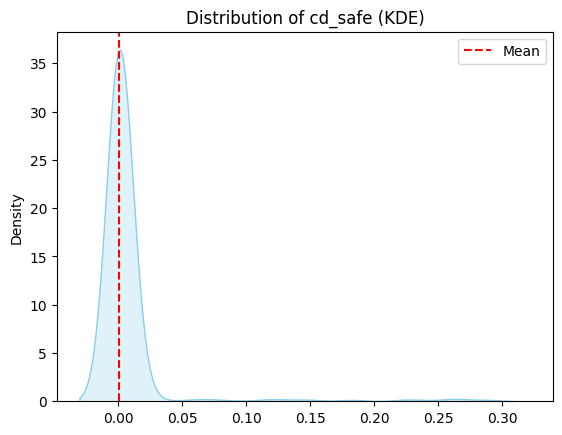

In [151]:
visualise_dist(cd_data)

In [152]:
# create df of the dataset
data = pd.DataFrame({
    'cd': cd_data,
    'cr': cr_data,
    'cu': cu_data,
    'co': co_data,
    'ni': ni_data,
    'fe': fe_data,
    'zn': zn_data,
    'pb': pb_data,
    'mn': mn_data  
})

data

,cd,cr,cu,co,ni,fe,zn,pb,mn
0,0.000840,0.010926,0.009137,0.005285,0.003237,0.053892,0.559032,0.011399,0.018650
1,0.000789,0.011909,0.009969,0.005484,0.003656,0.047244,0.468634,0.010925,0.019711
2,0.000852,0.008601,0.010018,0.004834,0.003835,0.045909,0.502261,0.010060,0.018415
3,0.000922,0.010563,0.010473,0.004694,0.004755,0.049983,0.502560,0.009353,0.019384
4,0.000781,0.009349,0.008633,0.004457,0.004223,0.049149,0.474911,0.010698,0.016213
...,...,...,...,...,...,...,...,...,...
565,0.267938,4.700359,1.360590,1.750510,0.964630,29.147317,181.779084,3.851378,1.354758
566,0.124550,3.755906,3.269430,2.741852,0.893995,17.594922,179.230050,1.257065,7.671778
567,0.052480,3.097340,2.325715,1.982887,1.847749,15.371530,60.980329,1.354706,8.448492
568,0.225631,3.414740,0.684871,2.482714,1.571482,28.515462,64.057168,2.573205,9.710781


In [153]:
# Shuffle the dataset
data = data.sample(frac= 1, random_state=42).reset_index(drop=True)
data

,cd,cr,cu,co,ni,fe,zn,pb,mn
0,0.008252,0.154064,0.025053,0.465121,0.087503,0.193970,18.733909,0.179877,0.111874
1,0.000829,0.010018,0.010572,0.005019,0.003492,0.053971,0.485126,0.009953,0.021931
2,0.000805,0.011530,0.010002,0.005232,0.003985,0.045768,0.468286,0.010422,0.020039
3,0.000672,0.010369,0.010487,0.004977,0.004197,0.053485,0.472194,0.008953,0.018557
4,0.061929,0.126553,0.078133,0.061887,0.043803,0.803229,1.389047,0.116689,0.362594
...,...,...,...,...,...,...,...,...,...
565,0.000923,0.011676,0.009295,0.004276,0.004681,0.043729,0.565599,0.010477,0.022472
566,0.000951,0.009226,0.009706,0.004698,0.003483,0.050613,0.461007,0.010613,0.018199
567,0.000915,0.010708,0.009868,0.004897,0.003914,0.050218,0.550091,0.011091,0.020695
568,0.000806,0.009498,0.010696,0.005736,0.004356,0.042485,0.519416,0.010283,0.019261


## Machine training

#### Anomally detection training

In [154]:
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [155]:
# Scalify the data to z score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [156]:
# expected rows of anomallies in the dataset
contamination = 0.05

# isolation forest model training for isolate anomallies
iso = IsolationForest(contamination=contamination, random_state=42)
iso.fit(data)

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [157]:
sample = {
    'cd': 0.001,
    'cr': 0.002,
    'cu': 0.004,
    'co': 0.04,
    'ni': 0.009,
    'fe': 0.009,
    'zn': 9999,
    'pb': 0.004,
    'mn': 0.0008,
}

sample_df = pd.DataFrame([sample])
sample_df_scaled = scaler.transform(sample_df)
pred = iso.predict(sample_df)
score = iso.decision_function(sample_df)
score[0], pred[0]

(np.float64(0.01606659252896614), np.int64(1))

In [158]:
def train_regressors(df):

    # Mask inliers from iso
    mask = iso.predict(df) == 1
    clean_df = df.loc[mask, POLLUTANTS].reset_index(drop=True)


    regressors = {}
    for target in POLLUTANTS:
        X = clean_df[[m for m in POLLUTANTS if m != target]]
        y = clean_df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf = RandomForestRegressor(n_estimators=150, random_state=42)
        rf.fit(X_train, y_train)
        r2 = rf.score(X_test, y_test)
        print(f"Trained regressor for {target} (R^2 on holdout): {r2:.3f}")
        regressors[target] = rf


    return regressors

In [164]:
regs = train_regressors(data)

Trained regressor for cd (R^2 on holdout): 0.428
Trained regressor for cr (R^2 on holdout): 0.172
Trained regressor for pb (R^2 on holdout): 0.189
Trained regressor for fe (R^2 on holdout): -0.026
Trained regressor for mn (R^2 on holdout): -0.666
Trained regressor for co (R^2 on holdout): -3.385
Trained regressor for ni (R^2 on holdout): 0.250
Trained regressor for zn (R^2 on holdout): 0.542
Trained regressor for cu (R^2 on holdout): 0.236


## Sample validation

In [ ]:
def validate_sample(sample):
    reasons = []
    decision = "accept"

    # 1) Hard rules
    for m in POLLUTANTS:
        if m not in sample:
            return {"decision": "reject", "reasons": [f"Missing value for {m}"]}
        
        val = sample.iloc[0][m]
        if pd.isna(val):
            return {"decision": "reject", "reasons": [f"{m} is empty"]}
        if val < 0:
            return {"decision": "reject", "reasons": [f"{m} cannot be negative ({val})"]}
        if val > INSANE_RANGES[m][1]:
            return {"decision": "reject", "reasons": [f"{m} value: {val} is greater than plausible maximum ({INSANE_RANGES[m][1]})"]}
        if val > GUIDES[m]:
            reasons.append(f"{m} ({val} mg/L) exceeds regulatory/warning threshold ({GUIDES[m]} mg/L)")
            decision = "warn"


    # 2) AI anomally detection
    iso_pred = iso.predict(sample)
    if iso_pred == -1:
        reasons.append("Anomaly detector: sample is statistically unusual compared to training data.")
    if decision != "reject":
        decision = "warn"

    # 3) Regression dependency checks
    for t in POLLUTANTS:
        X = sample[[m for m in POLLUTANTS if m != t]]
        y = sample.iloc[0][t]
        rf = regs[t]
        pred = rf.predict(X)[0]

        # find regression shift 
        denom = max(abs(pred), 1e-9)
        rel_diff = abs(pred - y) / denom

        if rel_diff > 3:
            reasons.append(f"{t} inconsistent with normal cases (it should be ~ {pred:.4g}, but it is actually ~ {y}, difference ~ {rel_diff:.2f})")
            if decision != "reject":
                decision = "warn"

    if not reasons:
        reasons.append("Passed all checks (within expected ranges & relationships).")

    return {"decision": decision, "reasons": reasons}

## Checking

In [187]:
sample = {
    'cd': 0.3,
    'cr': 0.002,
    'cu': 0.004,
    'co': 0.008,
    'ni': 0.009,
    'fe': 0.009,
    'zn': 0.0009,
    'pb': 0.004,
    'mn': 8000,
}

sample_df = pd.DataFrame([sample])
validate_sample(sample_df)

{'decision': 'reject',
 'reasons': ['mn value: 8000.0 is greater than plausible maximum (10.0)']}